# Process Data

In this Jupyter notebook, we will explore and clean data that is on the [Iris Flower Dataset](https://www.kaggle.com/arshid/iris-flower-dataset). The main goals of this process is to prepare the dataset for the training step. Please keep in mind that we will be working on this dataset as a classficiation problem.


![flowers](https://github.com/Murtada-Altarouti/Iris-flower-classification/blob/main/images/flower.jpg)

# Import Required Libraries

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sqlalchemy import create_engine

sns.set(rc={'figure.figsize':(15, 10)})
sns.set_theme(style="whitegrid", palette="deep")

import warnings
warnings.filterwarnings("ignore")

# Part 1: Data Exploration

In this section, we will explore and understand the dataset with some visualization

In [21]:
dataset = pd.read_csv('dataset.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### How many rows and columns in the dataset?

In [22]:
"The dataset has {} rows and {} columns".format(dataset.shape[0], dataset.shape[1])

'The dataset has 150 rows and 5 columns'

### What are the columns' types?

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


As seen above, The dataset has five columns. We have four columns that define the flower as a float, and the last column shows the flower's class.

### Are there any missing values?

In [24]:
dataset.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

As we can see that there are no null values

### Are there any duplicate records in the dataset?

In [25]:
dataset.duplicated().sum()

3

We found 3 duplicated records, let's remove them.

In [26]:
dataset.drop_duplicates(inplace=True)

Let's check if they got removed

In [27]:
dataset.duplicated().sum()

0

### What are the flower species?

In [28]:
dataset['species'].unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

We got 3 species which are Setosa, Versicolor and Virginica.

### How many records are there for each flower class?

In [29]:
dataset['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

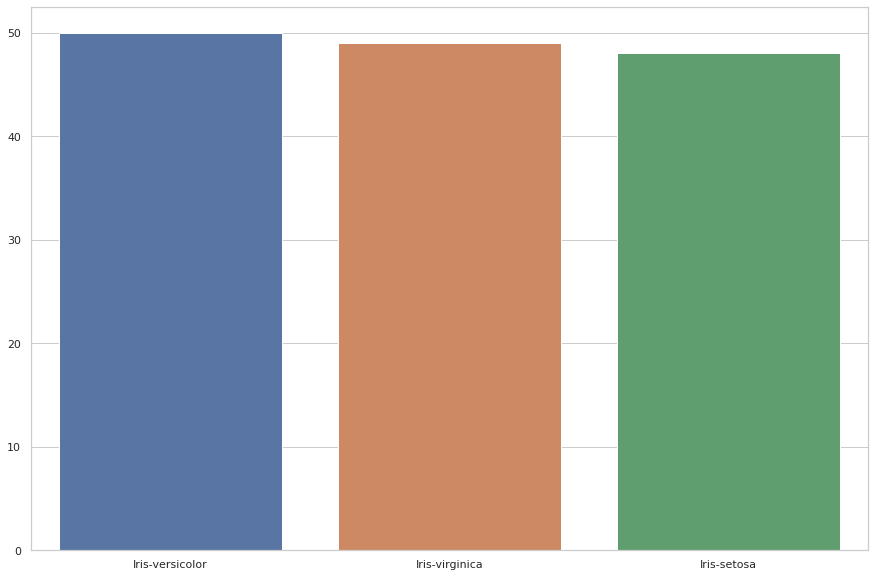

In [30]:
sns.barplot(dataset['species'].value_counts().index, dataset['species'].value_counts().values)

As shown above, there are almost 50 records of each flower class in the dataset

### What is the range of sepal and petal values in length and width?

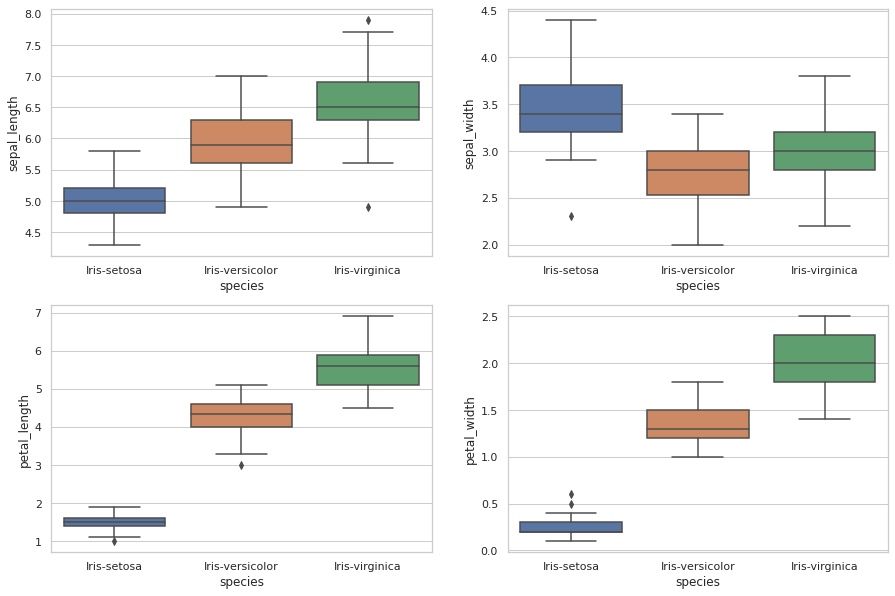

In [31]:
min_sepal_length, max_sepal_length = dataset['sepal_length'].min(), dataset['sepal_length'].max()
min_sepal_width, max_sepal_width = dataset['sepal_width'].min(), dataset['sepal_width'].max()
min_petal_length, max_petal_length = dataset['petal_length'].min(), dataset['petal_length'].max()
min_petal_width, max_petal_width = dataset['petal_width'].min(), dataset['petal_width'].max()

fig, axs = plt.subplots(ncols=2, nrows=2)
sns.boxplot(x='species',y='sepal_length', data=dataset, ax=axs[0][0])
sns.boxplot(x='species',y='sepal_width', data=dataset, ax=axs[0][1])
sns.boxplot(x='species',y='petal_length', data=dataset, ax=axs[1][0])
sns.boxplot(x='species',y='petal_width', data=dataset, ax=axs[1][1])

As it shown above, the sepal range is between 4.3cm and 7.9cm in length and 2.0cm and 4.4cm in width. But the petal range is between 1.0cm and 6.9cm in length and 0.1cm and 2.5cm in width.

The chart also shows that Virginica has the longest sepal length which may reach 7.9cm, as opposed to Setosa, which has a range of 4.3cm to 5.8cm. On the other hand, Setosa has the widest sepals at 4.4cm and Virginica has the highest petal length and width.

### What is the properties correlation of each flower class? 

### 1. Setosa

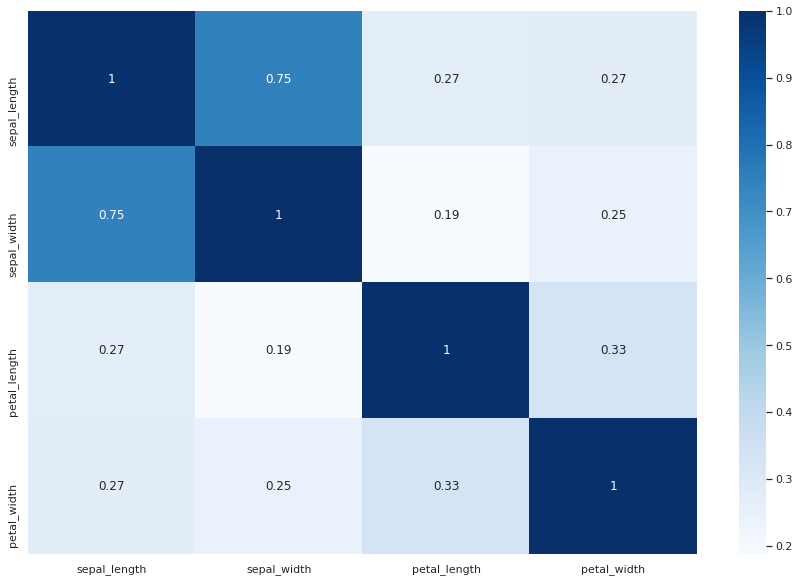

In [32]:
# Get only the setosa type
setosa = dataset[dataset['species'] == 'Iris-setosa'][['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
setosa_correlations = setosa.corr()
sns.heatmap(setosa_correlations, annot=True, cmap='Blues')

As demonstrated in the Setosa heatmap above, there is a strong association between septal width and septal length, implying that the longer the septal, the wider it may be. However, there is a low correlation between the petal width and petal length.

### 2. Versicolor

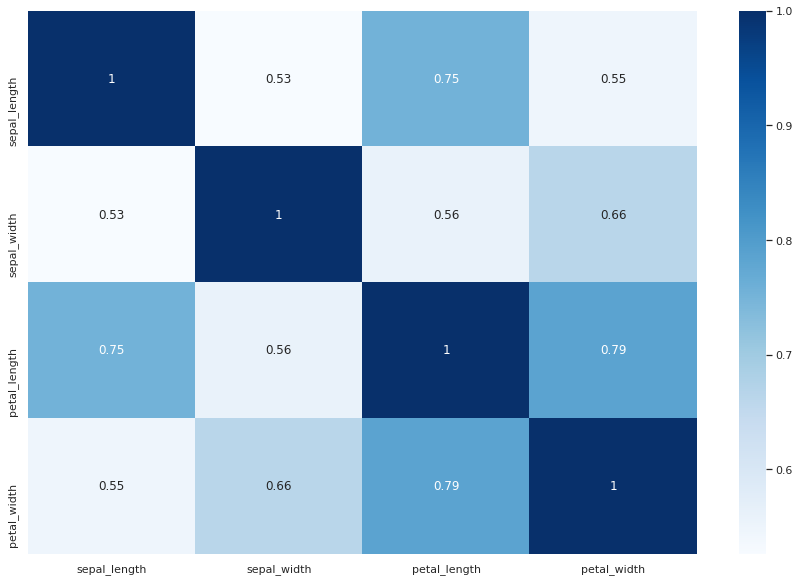

In [33]:
# Get only the versicolor type
versicolor = dataset[dataset['species'] == 'Iris-versicolor'][['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
versicolor_correlations = versicolor.corr()
sns.heatmap(versicolor_correlations, annot=True, cmap='Blues')

The Versicolor heatmap above shows that there is a high link between petal width and petal length with 79%, as well as there is a 75% relation between petal length and sepal length.

### 3. Virginica

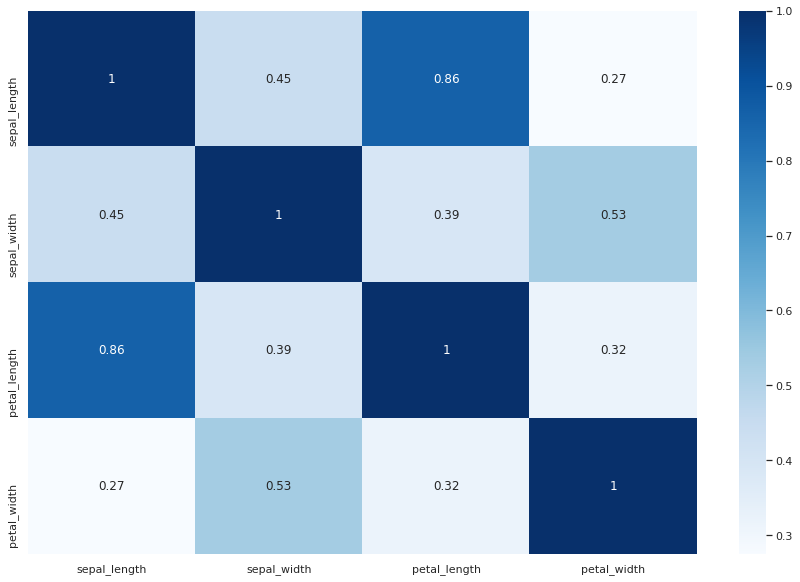

In [34]:
# Get only the Virginica type
virginica = dataset[dataset['species'] == 'Iris-virginica'][['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
virginica_correlations = virginica.corr()
sns.heatmap(virginica_correlations, annot=True, cmap='Blues')

Virginica heatmap shows that there is a strong correlation between sepal length and petal length with 86%.

# Part 2: Data Preparation

In this section, we will prepare the dataset for the next training step as SQLite database

In [35]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Encode the classes to numbers

In [36]:
label_encoder = LabelEncoder()
dataset['species'] = label_encoder.fit_transform(dataset['species'])

In [37]:
dataset['species'].unique()

array([0, 1, 2])

This step is important because computers deal with numbers better than anything

### Save the dataset

In [38]:
engine = create_engine('sqlite:///dataset.db')
dataset.to_sql('dataset', engine, index=False, if_exists='replace')